In [1]:
import ROOT

Welcome to JupyROOT 6.17/01


In [2]:
from PileUp_SF_config import *

In [3]:
from ROOT import TFile, TH2F, TCanvas, TH1D, TH1F

In [4]:
f  = TFile(PileUp_SFLow_path_Data)

In [5]:
f.ls()

TFile**		./DATA/MyDataPileupHistogram_23sepjsonfile_true692minus4p6_75bin.root	
 TFile*		./DATA/MyDataPileupHistogram_23sepjsonfile_true692minus4p6_75bin.root	
  KEY: TH1D	pileup;1	pileup


In [6]:
h = TH1D()

In [7]:
c = TCanvas("SF","SF",600,400)

In [8]:
f.GetObject("pileup",h)

Info in <TCanvas::Print>: pdf file PileUp_SFUp.pdf has been created


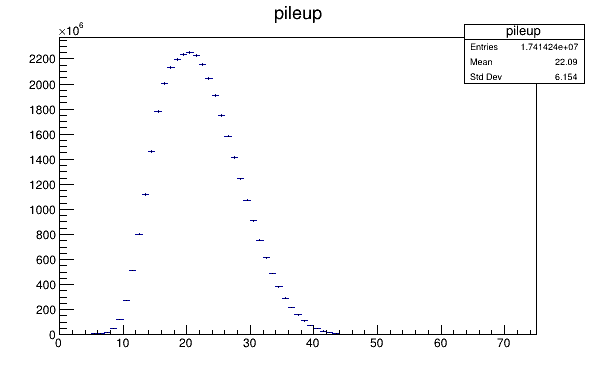

In [9]:
h.Draw("colz")
c.Draw()
c.SaveAs("PileUp_SFUp.pdf")

In [10]:
#normalize histogram
nx = h.GetNbinsX()
print("# bins X = "+str(nx))
h.Scale(1.0/h.Integral())

# bins X = 75


In [11]:
# Read text file (MC values)
txt = open(PileUp_SF_path_MC)
mc = str()
for line in txt:
    mc += line
mc = mc.strip().split("=")[1].split("{")[1].split("}")[0].split(" ,")
mc = map(lambda x: float(x),mc)   

In [12]:
# Scale histogram (to match MC with Data)
for i in xrange(0,nx):
    bin_index = i + 1
    h.SetBinContent(bin_index,(1.0/mc[i])*h.GetBinContent(bin_index) )

Info in <TCanvas::Print>: pdf file PileUp_SFUp.pdf has been created


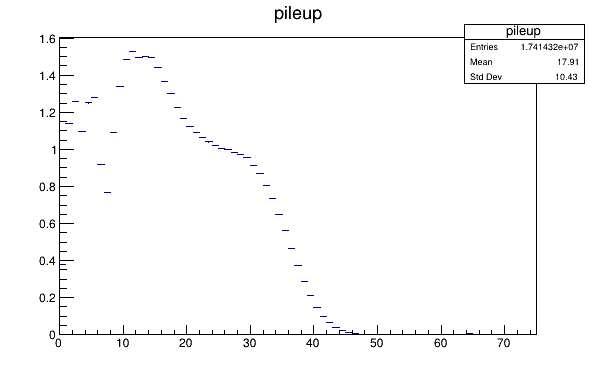

In [14]:
h.Draw("colz")
c.Draw()
c.SaveAs("PileUp_SFUp.pdf")

In [15]:
dotH_name = "PileUp_SF"+"Up"+".h"
dotC_name = "PileUp_SF"+"Up"+".C"
func_type = "Double_t"
func_name = "pileUp_SF"+"Up"
x_type = "Int_t"
x_name = "nTrueInt"

In [16]:
dotH = str()

dotH += "#ifndef "+dotH_name.upper().split(".")[0]+str("_H_INCLUDED\n")
dotH += "#define "+dotH_name.upper().split(".")[0]+str("_H_INCLUDED\n")
dotH += "\n"
dotH += func_type+" "+func_name+"("+x_type+" "+x_name+");\n"
dotH += "\n"
dotH += "#endif"
print(dotH)

#ifndef PILEUP_SFUP_H_INCLUDED
#define PILEUP_SFUP_H_INCLUDED

Double_t pileUp_SFUp(Int_t ntrueint);

#endif


In [17]:
dotC = str()

dotC += "#include \""+dotH_name+"\"\n\n"
dotC += func_type+" "+func_name+"("+x_type+" "+x_name+"){\n"
for i in xrange(0,nx):
    bin_index = i+1
    dotC += "\tif( "+x_name+" == "+str(i)+"){\n"
    dotC += "\t\treturn\t"+str(h.GetBinContent(bin_index))+";\n"
    dotC += "\t}\n"
dotC += "\n\telse cout<<\"ERROR: UNEXPECTED behavior in one of pileUp_SF... function\"<<endl;\n"
dotC += "\tif( "+x_name+" > 74 || "+x_name+" < 0){\n"
dotC += "\t\tcout<<\"Error: Wrong number of nTrueInt(pileUp)\"<<endl;\n"
dotC += "\t\texit(1);\n"
dotC += "\t}\n"
dotC += "\n\treturn\t1000000;\n"
dotC+="}"

#include "PileUp_SFUp.h"

Double_t pileUp_SFUp(Int_t ntrueint){
	if( ntrueint == 0){
		return	0.379282949429;
	}
	if( ntrueint == 1){
		return	1.14126007299;
	}
	if( ntrueint == 2){
		return	1.25989998102;
	}
	if( ntrueint == 3){
		return	1.09894777201;
	}
	if( ntrueint == 4){
		return	1.25010849823;
	}
	if( ntrueint == 5){
		return	1.28088630183;
	}
	if( ntrueint == 6){
		return	0.920197849235;
	}
	if( ntrueint == 7){
		return	0.767802424551;
	}
	if( ntrueint == 8){
		return	1.09270088343;
	}
	if( ntrueint == 9){
		return	1.33758990757;
	}
	if( ntrueint == 10){
		return	1.48643531011;
	}
	if( ntrueint == 11){
		return	1.52843777815;
	}
	if( ntrueint == 12){
		return	1.49791860091;
	}
	if( ntrueint == 13){
		return	1.50104583587;
	}
	if( ntrueint == 14){
		return	1.49738515553;
	}
	if( ntrueint == 15){
		return	1.44377825397;
	}
	if( ntrueint == 16){
		return	1.36788039759;
	}
	if( ntrueint == 17){
		return	1.29897542453;
	}
	if( ntrueint == 18){
		return	1.22735703773;
	}
	if( ntruein

In [18]:
def write_code(name,s):
    code_file = file(name,"w")
    code_file.write(s)
    code_file.close()
    
write_code(dotH_name,dotH)
write_code(dotC_name,dotC)